<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.520235  70.781195  55.064556  ...  191.311477  191.353483 -0.042007
      1.0    49.633248  31.808392  89.943005  ...  181.519134  181.385074  0.134060
      2.0    79.051543  86.882070  86.242875  ...  262.263377  262.221342  0.042035
      3.0    32.810280  68.486692  41.625341  ...  152.872141  152.874634 -0.002494
      4.0    85.777397  28.543795  67.874953  ...  191.593627  192.209705 -0.616079
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  73.858673  38.595120  58.321323  ...  180.517644  180.760724 -0.243079
      246.0  89.759600  89.326499  98.704931  ...  287.947491  287.795589  0.151902
      247.0  20.756026  33.971366  62.009625  ...  126.762938  126.736918  0.026020
      248.0  25.214799  76.248143  59.392842  ...  171.078248  170.878799  0.199448
      249.0  26.942382  48.174964  66.909055  ...  151.897119  152.031824 -0.134705

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.520235  70.781195  55.064556  ...  191.311477  191.353483 -0.042007
      1.0    49.633248  31.808392  89.943005  ...  181.519134  181.385074  0.134060
      2.0    79.051543  86.882070  86.242875  ...  262.263377  262.221342  0.042035
      3.0    32.810280  68.486692  41.625341  ...  152.872141  152.874634 -0.002494
      4.0    85.777397  28.543795  67.874953  ...  191.593627  192.209705 -0.616079
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  73.858673  38.595120  58.321323  ...  180.517644  180.760724 -0.243079
      246.0  89.759600  89.326499  98.704931  ...  287.947491  287.795589  0.151902
      247.0  20.756026  33.971366  62.009625  ...  126.762938  126.736918  0.026020
      248.0  25.214799  76.248143  59.392842  ...  171.078248  170.878799  0.199448
      249.0  26.942382  48.174964  66.909055  ...  151.897119  152.031824 -0.134705

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    55.520235  70.781195  55.064556  ...  191.311477  191.353483 -0.042007
      1.0    49.633248  31.808392  89.943005  ...  181.519134  181.385074  0.134060
      2.0    79.051543  86.882070  86.242875  ...  262.263377  262.221342  0.042035
      3.0    32.810280  68.486692  41.625341  ...  152.872141  152.874634 -0.002494
      4.0    85.777397  28.543795  67.874953  ...  191.593627  192.209705 -0.616079
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  73.858673  38.595120  58.321323  ...  180.517644  180.760724 -0.243079
      246.0  89.759600  89.326499  98.704931  ...  287.947491  287.795589  0.151902
      247.0  20.756026  33.971366  62.009625  ...  126.762938  126.736918  0.026020
      248.0  25.214799  76.248143  59.392842  ...  171.078248  170.878799  0.199448
      249.0  26.942382  48.174964  66.909055  ...  151.897119  152.031824 -0.134705

[250000 rows x 7 columns]

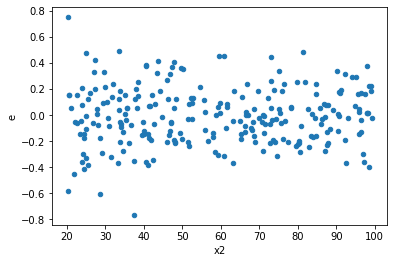

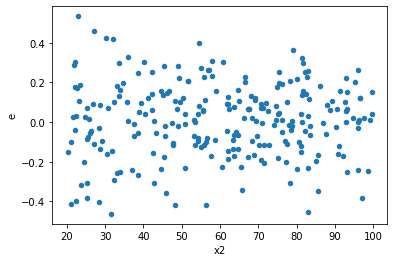

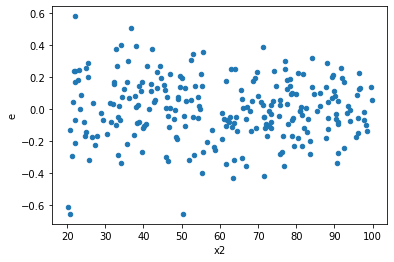

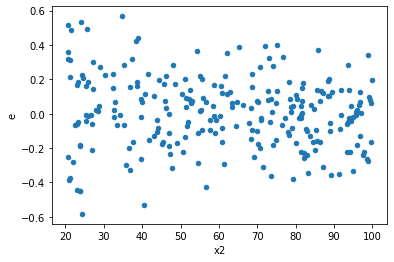

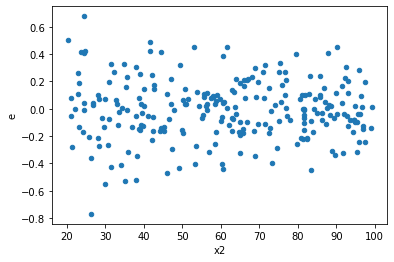

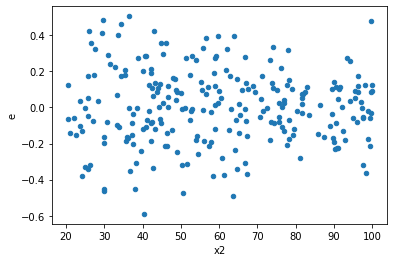

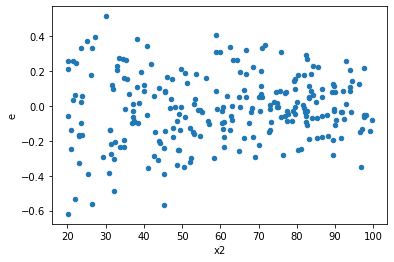

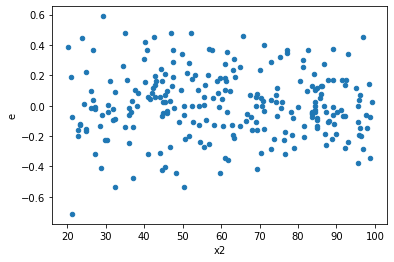

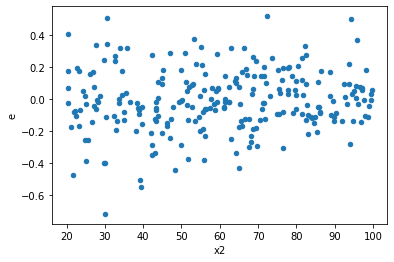

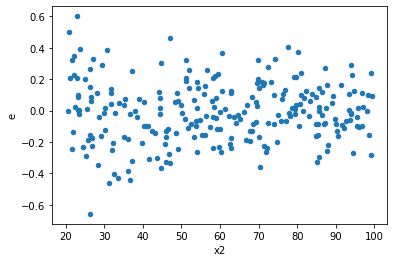

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,6.354302268846438,3.3493548391486447,0.06550827081284988,0.03452943133142933,0.527100332568329,0.0018139695311457787,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,4.262809477273472,2.5427863548842837,0.04394648945642755,0.02621429231839468,0.5965048094316124,0.011606869360046615,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,4.926121655156905,2.5428863694325226,0.05078475933151448,0.026215323396211573,0.5162045413089839,0.0012859265296589848,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,5.4913246674000264,3.0730769229578567,0.05661159450927862,0.031681205391318114,0.5596239721904596,0.004631136241450423,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,6.673318754283238,3.2799875847470483,0.068797100559621,0.03381430499739225,0.4915077048645105,0.0005541029787838737,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,5.425383283324846,2.406958163371521,0.05593178642602934,0.024814001684242484,0.44364757984369746,8.180123218012956e-05,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,5.707725609487798,1.8437804113321634,0.058842532056575234,0.01900804547765117,0.3230324191245804,6.20639945870414e-08,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,5.849519138508074,3.514714946332312,0.060304321015547155,0.03623417470445683,0.6008553631690047,0.01281913962909965,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,4.6204833455685215,2.51474208247676,0.04763384892338682,0.025925176108007836,0.5442595274991381,0.003022382606056933,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    786
Reject001=1 : Homoscedasticity      214
Name: Result_test, dtype: int64